<a href="https://colab.research.google.com/github/AbikshaaDevi/Heart_disease_detection/blob/main/Cardio_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('/content/cardio_train (1).csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.drop('id', axis=1, inplace=True)
df['age'] = (df['age'] / 365).astype(int)
df.drop_duplicates(inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,1,165,80.0,150,80,1,1,0,0,1,1
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


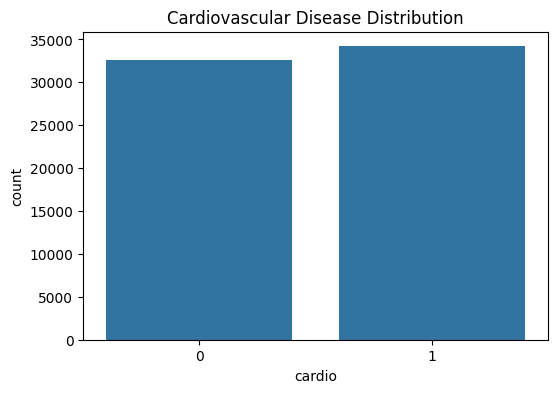

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=df)
plt.title("Cardiovascular Disease Distribution")
plt.show()

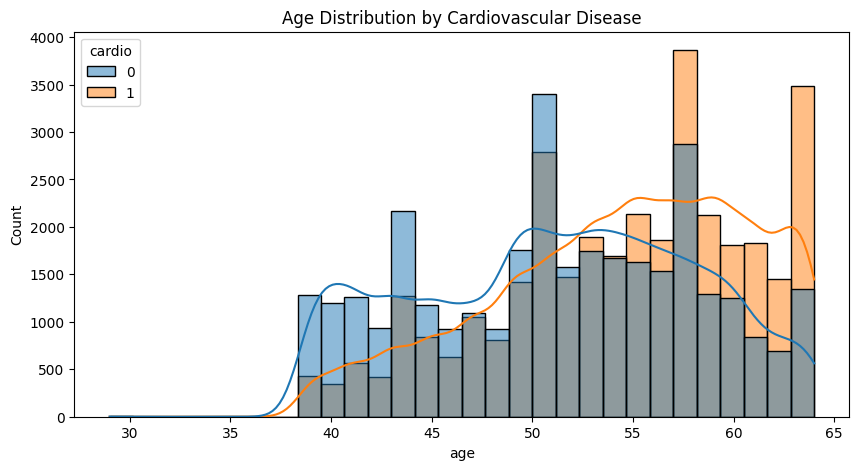

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='cardio', bins=30, kde=True)
plt.title("Age Distribution by Cardiovascular Disease")
plt.show()

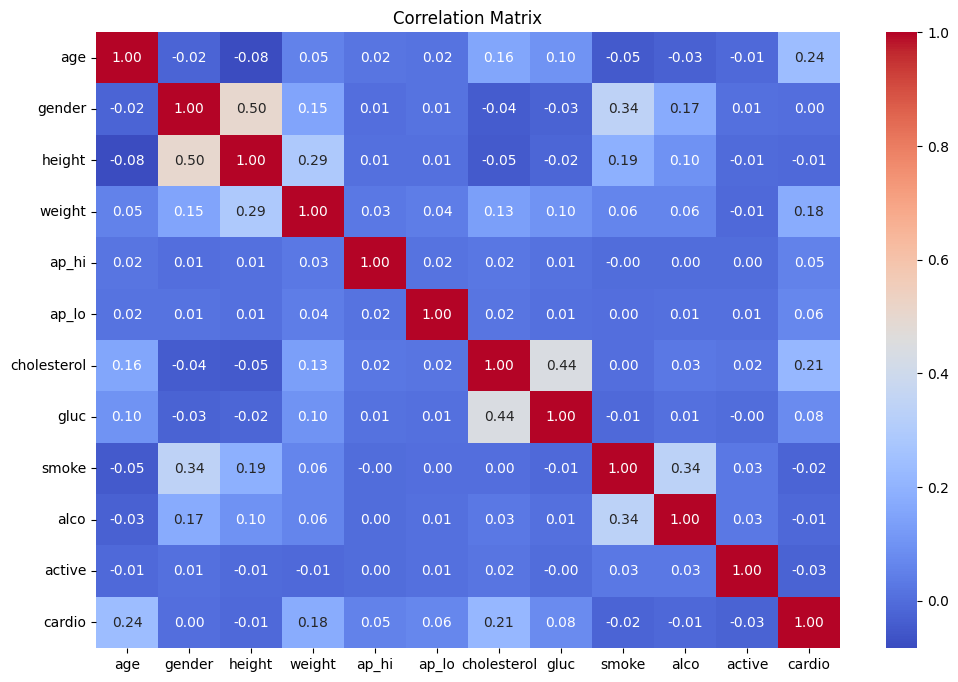

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = df.drop('cardio', axis=1)
y = df['cardio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42)
}

accuracy_results = {}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

SVM Accuracy: 0.73
KNN Accuracy: 0.65
Decision Tree Accuracy: 0.61
Logistic Regression Accuracy: 0.72
Random Forest Accuracy: 0.70


In [ ]:
best_model_name = max(accuracy_results, key=accuracy_results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {accuracy_results[best_model_name]:.2f}")


Best Model: SVM with Accuracy: 0.73


In [ ]:
best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_best_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      6520
           1       0.74      0.72      0.73      6839

    accuracy                           0.73     13359
   macro avg       0.73      0.73      0.73     13359
weighted avg       0.73      0.73      0.73     13359



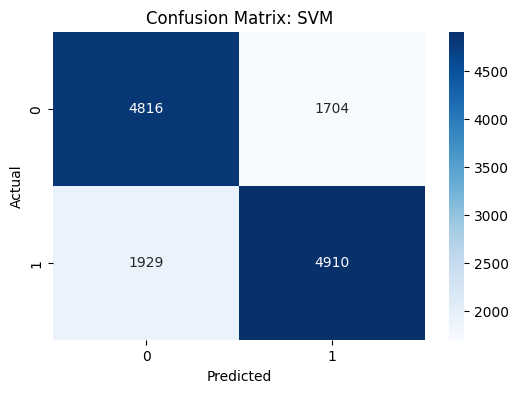

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_best_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()